In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

df_model = pd.read_csv("clean_movies_dataset.csv")
# y is the target variable we have taken log of the box_office_millionUSD
y = np.log1p(df_model["box_office_millionUSD"])

#x_num has the input variables
X_num = df_model[["log_budget", "year"]]

X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)

# here Baseline function i have used is Linear Regression and the Advanced function i have used is Gradient Boosting
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Evaluation matrices i have used are mae(mean absolute error),rmse(root mean squared error) and R square
def evaluate(y_true, y_pred, name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    r2 = r2_score(y_true, y_pred)
    print(f"{name} → MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")


print("Setup 1: Numeric only")
evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_gb, "Gradient Boosting")

# here i have also tried to incorporate title in input to check whether title inclusion will improve the accuracy further 
vectorizer = TfidfVectorizer(max_features=500, stop_words="english")
X_text = vectorizer.fit_transform(df_model["title_clean"])

# Combining numeric and text data
X_full = hstack([X_num, X_text])

X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

lr_text = LinearRegression()
lr_text.fit(X_train, y_train)
y_pred_lr_text = lr_text.predict(X_test)

gb_text = GradientBoostingRegressor(random_state=42)
gb_text.fit(X_train, y_train)
y_pred_gb_text = gb_text.predict(X_test)

print("\nSetup 2: Numeric + Text")
evaluate(y_test, y_pred_lr_text, "Linear Regression (with text)")
evaluate(y_test, y_pred_gb_text, "Gradient Boosting (with text)")

Setup 1: Numeric only
Linear Regression → MAE: 0.403, RMSE: 0.516, R²: 0.943
Gradient Boosting → MAE: 0.296, RMSE: 0.389, R²: 0.967

Setup 2: Numeric + Text
Linear Regression (with text) → MAE: 0.479, RMSE: 0.656, R²: 0.907
Gradient Boosting (with text) → MAE: 0.286, RMSE: 0.376, R²: 0.969


# so, here after looking at the metrices we can conclude that Gradient bossting is better model than Linear regression and inclusin of title as input does not bring significant improvement

In [ ]:
# Here we are doing Back transform to take inverse log and convert data back to actual values
y_test_real = np.expm1(y_test) 
y_pred_lr_real = np.expm1(y_pred_lr)
y_pred_gb_real = np.expm1(y_pred_gb)

# Here we are plotting sactter plot of Linear Regression (log scale)

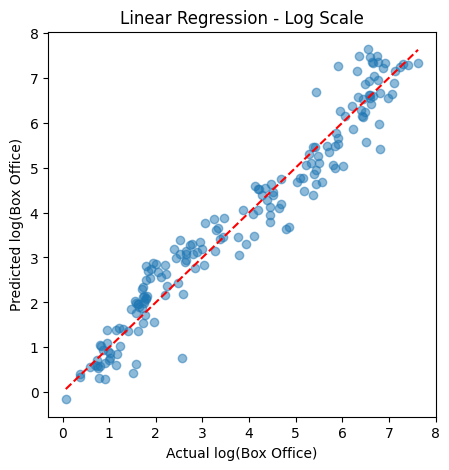

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual log(Box Office)")
plt.ylabel("Predicted log(Box Office)")
plt.title("Linear Regression - Log Scale")
plt.show()

# Here we are plotting sactter plot of Gradient Bossting (log scale)

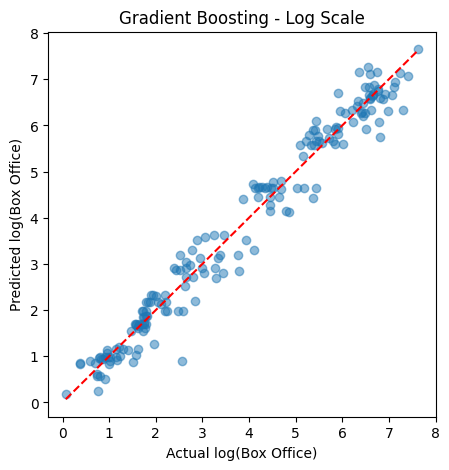

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual log(Box Office)")
plt.ylabel("Predicted log(Box Office)")
plt.title("Gradient Boosting - Log Scale")
plt.show()

# Here we are plotting sactter plot of Linear Regression (real scale)

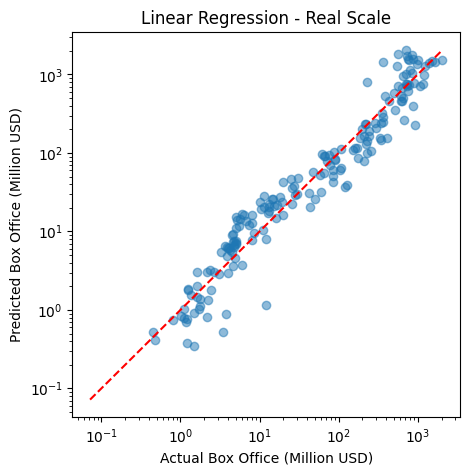

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test_real, y_pred_lr_real, alpha=0.5)
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--')
plt.xlabel("Actual Box Office (Million USD)")
plt.ylabel("Predicted Box Office (Million USD)")
plt.title("Linear Regression - Real Scale")
plt.xscale("log")
plt.yscale("log")
plt.show()

# Here we are plotting sactter plot of Gradient Boosting (Real scale)

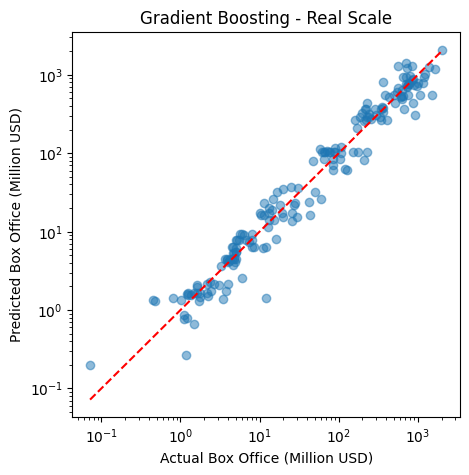

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test_real, y_pred_gb_real, alpha=0.5)
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--')
plt.xlabel("Actual Box Office (Million USD)")
plt.ylabel("Predicted Box Office (Million USD)")
plt.title("Gradient Boosting - Real Scale")
plt.xscale("log")
plt.yscale("log")
plt.show()